Group Members 
<ul>
    <li>Brynx Alegarbes</li>
    <li>Michael Deekimcheng</li>
    <li>Harvey Felipe</li>
    <li>Ellyn Lee</li>
    <li>Jeremy Tan</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.ndimage import gaussian_filter1d

In [30]:
df = pd.read_csv("./wdbc-1.csv", header = None)
df
df = df.drop([0], axis = 1)
df
df[1] = df[1].apply(lambda x: 1 if x == 'M' else 0)
df["Label"] = df[1]
df = df.drop([1], axis = 1)
# 1 means malignant
# 2 means benign
df

,2,3,4,5,6,7,8,9,10,11,...,23,24,25,26,27,28,29,30,31,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [66]:
norm_df=(df-df.min())/(df.max()-df.min())
norm_df

,2,3,4,5,6,7,8,9,10,11,...,23,24,25,26,27,28,29,30,31,Label
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,1.0
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,1.0
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,1.0
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,1.0


In [78]:
y_train, y_test, x_train, x_test = train_test_split(norm_df["Label"], norm_df.loc[:, norm_df.columns != "Label"], train_size = 0.7)
# Fixing the column names
x_train.columns = range(x_train.shape[1])
x_test.columns = range(x_test.shape[1])
x_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
78,0.624686,0.482246,0.690415,0.467232,0.685836,1.000000,0.879569,0.797217,0.932323,0.662595,...,0.549271,0.525053,0.597091,0.353372,0.612362,0.571557,0.613498,0.861856,0.763848,0.292536
321,0.623740,0.336490,0.603345,0.479533,0.248894,0.203239,0.270619,0.383996,0.438384,0.021061,...,0.538243,0.293443,0.496987,0.361728,0.226045,0.122644,0.208147,0.489691,0.293712,0.028139
247,0.279663,0.148799,0.284431,0.156394,0.315699,0.353414,0.321931,0.197813,0.270707,0.297599,...,0.229811,0.151386,0.271876,0.111556,0.358119,0.540996,0.617173,0.536426,0.211709,0.411649
261,0.490747,0.451471,0.464446,0.334931,0.306852,0.133489,0.067737,0.141004,0.254545,0.065501,...,0.424048,0.518390,0.387420,0.253834,0.348874,0.117696,0.096725,0.282990,0.174847,0.066312
367,0.247480,0.281028,0.238546,0.133574,0.358220,0.160634,0.102905,0.100746,0.320707,0.193766,...,0.226254,0.320362,0.216345,0.107993,0.433402,0.184058,0.192732,0.303402,0.325843,0.128952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.430167,0.336152,0.416765,0.285981,0.352532,0.198945,0.228889,0.329920,0.372727,0.083193,...,0.421202,0.334222,0.390408,0.255063,0.520571,0.171930,0.225958,0.522337,0.213877,0.057917
560,0.334564,0.589787,0.328865,0.193807,0.421233,0.285933,0.104545,0.213917,0.240909,0.247473,...,0.262184,0.563699,0.247971,0.128170,0.349534,0.193178,0.105911,0.360137,0.135029,0.184770
260,0.630839,0.586743,0.615783,0.485472,0.427643,0.274278,0.355904,0.463867,0.380808,0.121314,...,0.583422,0.723348,0.557249,0.407688,0.535099,0.259248,0.302556,0.583162,0.312636,0.163649
200,0.248426,0.333108,0.240135,0.134677,0.390268,0.188608,0.098102,0.204125,0.464141,0.214195,...,0.231590,0.435501,0.207879,0.111384,0.473684,0.171639,0.109984,0.371134,0.217426,0.175128


In [80]:
model = GaussianNB()

model.fit(x_train, y_train)

print("Naive Bayes score: ",model.score(x_test, y_test))

Naive Bayes score:  0.9239766081871345


<b>Interpretation:</b> <br>
Our Gaussian Naive Bayes model is 92.39% accurate on the testing data in classifying each data point as either being malignant or benign depending on the independent variables, x.   

# Finding the optimal epsilon value

0.2520205095856954
0.2838223415905686
0.3075753302450592
0.32486029960778345
0.35220404504459135
0.3701727654436644
0.6978492957585904


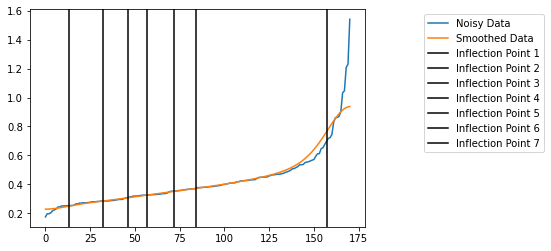

In [81]:
nbrs = NearestNeighbors(n_neighbors=3).fit(x_test)
distances, indices = nbrs.kneighbors(x_test)

distances = distances[:,2]
distances = np.sort(distances, axis=0)

# smooth
smooth = gaussian_filter1d(distances, 10)

# compute second derivative
smooth_d2 = np.gradient(np.gradient(smooth))

# find switching points
infls = np.where(np.diff(np.sign(smooth_d2)))[0]

# plot results
plt.plot(distances, label='Noisy Data')
plt.plot(smooth, label='Smoothed Data')
for i, infl in enumerate(infls, 1):
    print(distances[infl])
    plt.axvline(x=infl, color='k', label=f'Inflection Point {i}')
plt.legend(bbox_to_anchor=(1.55, 1.0))

"We find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results." <br>
The suitable value for epsilon is given by the point of inflection on the graph, here it is 0.697.

Source: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

# Finding the optimal min_samples parameter
min_samples = (2 x d), where d = dimensionality of data <br>
min_samples = (2 x 2) = 4

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Estimated no. of clusters: 2
Estimated no. of noise points: 11


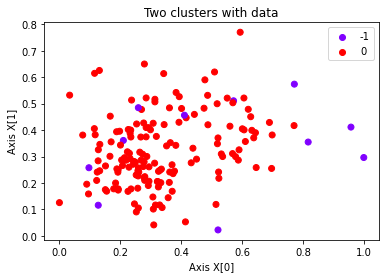

In [86]:
import pandas as pd
from sklearn.cluster import DBSCAN
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create DBSCAN model
dbscan = DBSCAN(eps=0.697, min_samples=4) 

# Fit the model to the dataset
dbscan.fit(x_test)

# Get the cluster labels
labels = dbscan.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

X = x_test.values

scatter = plt.scatter(X[:,0], X[:,1], c=labels, cmap = "rainbow", marker="o", picker=True)

# Create legend
unique_labels = np.unique(labels)
handles = []
for label in unique_labels:
    handles.append(plt.scatter([], [], c=scatter.cmap(scatter.norm(label)), label=label, cmap="rainbow"))
    
plt.legend(handles = handles)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [87]:
noise = [i for i,j in enumerate(labels) if j == -1]

noisy_points = pd.DataFrame(y_test).iloc[noise]

noisy_points["Label"].value_counts()

1.0    9
0.0    2
Name: Label, dtype: int64

In [88]:
noise

[1, 43, 58, 61, 64, 83, 102, 118, 126, 139, 164]

This means that among the noisy points: 9 are malignant and 2 are benign.

In [89]:
test = pd.concat([x_test, y_test], axis = 1)
test = test.groupby(["Label"]).mean()
test["std_dev"] = test.std(axis = 1)
test

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,std_dev
Label,,,,,,,,,,,,,,,,,,,,,
0.0,0.239597,0.274977,0.232071,0.132236,0.372911,0.187295,0.110606,0.129573,0.345280,0.283451,...,0.309299,0.175927,0.088392,0.366987,0.150648,0.134527,0.252276,0.225527,0.161909,0.092072
1.0,0.502685,0.399139,0.501252,0.362950,0.458165,0.398539,0.387298,0.445804,0.454681,0.274614,...,0.465678,0.459072,0.311507,0.501311,0.351779,0.375726,0.641945,0.350433,0.247781,0.140484


<h1><b>Interpretation</b></h1> <br>
The standard deviation of the means of the columns for the malignant cases is 0.14 while the standard deviation for the benign cases is 0.09. This means that the the data under the malignant cases is more spread out, which will result in more outlier values for the malignant cases.

Testing the clusters for the first two variables

Estimated no. of clusters: 2
Estimated no. of noise points: 14


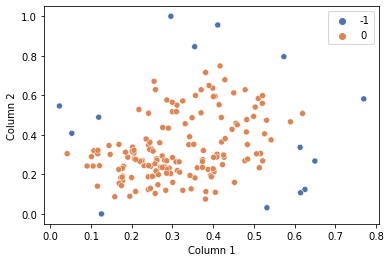

In [91]:
x_test2 = x_test.iloc[:, 1:3]

# Create DBSCAN model
dbscan = DBSCAN(eps=0.07, min_samples= 3)

# Fit the model to the dataset
dbscan.fit(x_test2)

# Get the cluster labels
labels = dbscan.labels_


no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

sns.scatterplot(data=x_test2, x=x_test2.iloc[:, 0], y=x_test2.iloc[:, 1], hue=labels, palette='deep', legend = "full")
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.show()

# Dimensionality Reduction using TSNE
t-Distributed Stochastic Neighbor Embedding <br>
We can collapse our 30 dimensional dataset into 2 dimensions. <br>
Source: https://towardsdatascience.com/high-dimension-clustering-w-t-sne-dbscan-dcec77e6a39b

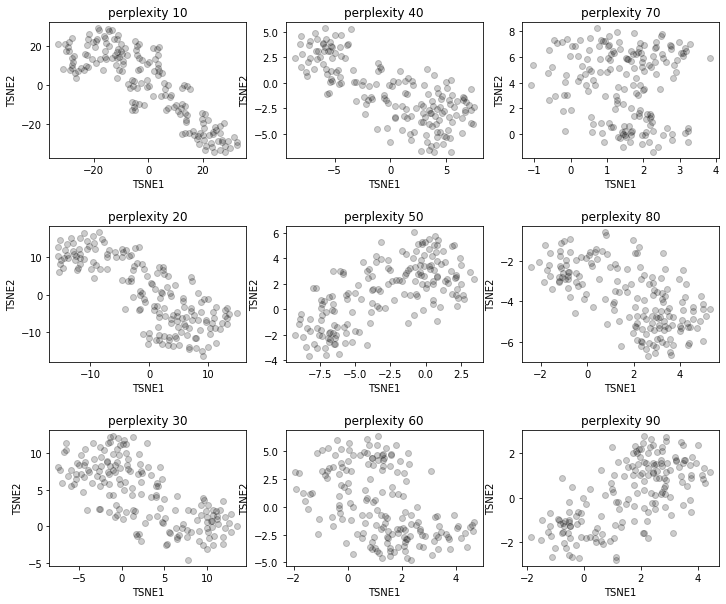

In [92]:
plotX = x_test.copy()
# we find the optimal value for the perplexity parameter
ps = [10,20,30,40,50,60,70,80,90] 

fig,ax = plt.subplots(3,3,figsize=(12,10))
plt.subplots_adjust(hspace=.5)
import math
from sklearn.manifold import TSNE

for i, perplexity in enumerate(ps):
  tsne = TSNE(n_components=2, perplexity=perplexity)
  tsneComponents = tsne.fit_transform(plotX)
  TSNE_components = pd.DataFrame(tsneComponents, index=plotX.index)

  ax[i%3][math.floor(i/3)].set_title(f'perplexity {perplexity}')
  ax[i%3][math.floor(i/3)].scatter(TSNE_components[0], TSNE_components[1], alpha=.2, color='black')
  ax[i%3][math.floor(i/3)].set(xlabel='TSNE1')
  ax[i%3][math.floor(i/3)].set(ylabel = 'TSNE2')

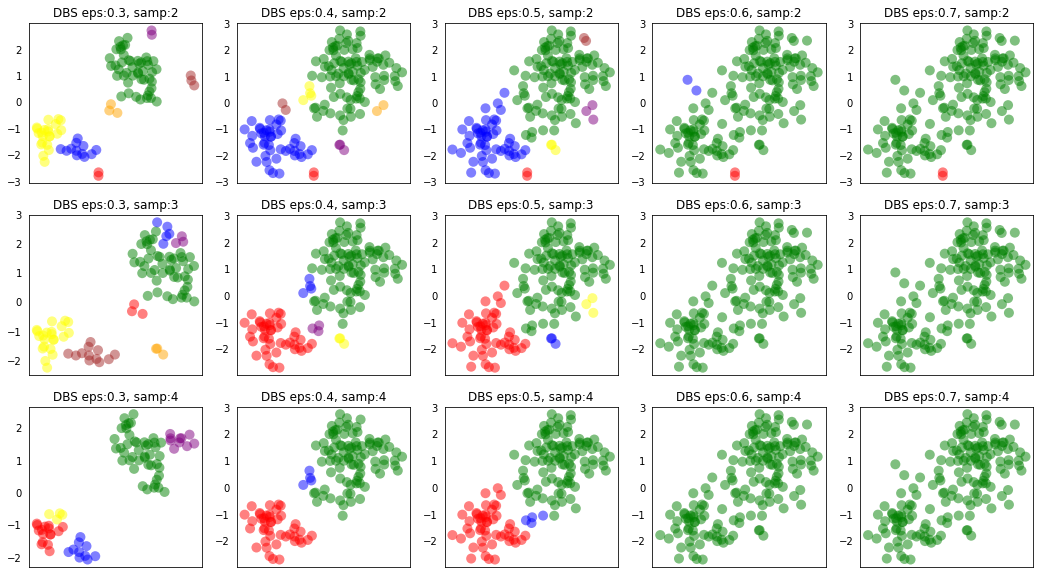

In [93]:
from itertools import product
from math import floor
from sklearn.cluster import DBSCAN


samp_list = [2,3,4]
eps_list = [0.3, 0.4, 0.5, 0.6, 0.7]
rows = len(samp_list)

fig, ax = plt.subplots(len(samp_list), len(eps_list), figsize=(18,10))

for k, (eps, samp) in enumerate(product(eps_list, samp_list)):
  ax[k%rows][floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False)

  TSNE_df = TSNE_components.copy()
  clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
  TSNE_df.insert(0, 'cluster', clustering.labels_)

  datas = [[TSNE_df[TSNE_df['cluster']==i][j]for j in range(2)]for i in range(len(set(clustering.labels_)))]
  colors = ('green', 'red', 'blue', 'yellow', 'purple', 'brown', 'orange')
  groups = [str(i) for i in range(len(set(clustering.labels_)))]

  for data,color,group in zip(datas,colors,groups):
    ax[k%rows][floor(k/rows)].scatter(data[0],data[1], alpha=0.5, c=color, edgecolors='none', s=100, label=group)
    ax[k%rows][floor(k/rows)].set_title(f'DBS eps:{eps}, samp:{samp}')
